<a href="https://colab.research.google.com/github/yasminenavishaa/PCVK/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laporan Praktikum Pertemuan 7
Nama : Yasmine Navisha Andhani

Kelas : D4-TI / 3G

NIM : 2141720047

## Praktikum Filter

1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa menggunakan library atau metode konvolusi dari OpenCV.
2. Berikut merupakan langkah-langkah yang dapat dilakukan:

      a.  Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan pada akun github seperti pada modul sebelumnya.

      b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

  c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi. Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan padding.

### **Konvolusi tanpa library**
Membuat fungsi konvolusi, Fungsi konvolusi yang dibuat memliki parameter berupa :
1. Citra masukan,
2. Kernel berupa matriks untuk memfilter citra,
3. Nilai stride/besarnya pergeseran untuk setiap konvolusi,
4. Nilai pad yang akan ditambahkan pada citra


  d. Load citra yang akan diproses dan ubah menjadi citra keabuan

   e. Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening sebagai berikut:
  
  f. Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil konvolusinya:



In [3]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image

In [4]:
img_m = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Images (1)/female.tiff')
img_s = cv.resize(img_m, (0,0), fx=0.5, fy=0.5)
img_gray = cv.cvtColor(img_m, cv.COLOR_BGR2GRAY)

 3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter berikut:

 **Sharpen**

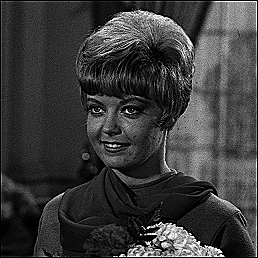

In [5]:
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

**Emboss**

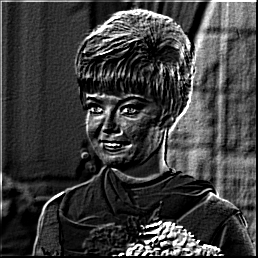

In [6]:
kernel_embos = np.array([[-2, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 2]])
cv2_imshow(convolution2d(img_gray, kernel_embos, 1, 2))

**Left Sobel Edge Detection**

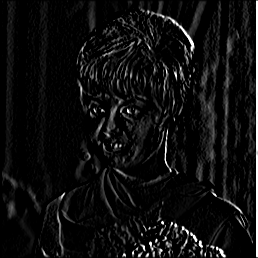

In [7]:
kernel_sobel = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])
cv2_imshow(convolution2d(img_gray, kernel_sobel, 1, 2))

**Canny Edge Detection**

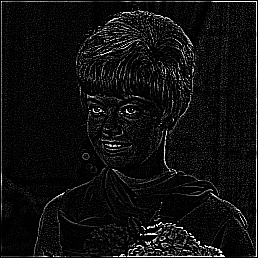

In [8]:
kernel_canny = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])
cv2_imshow(convolution2d(img_gray, kernel_canny, 1, 2))

**Prewitt Edge Detection**

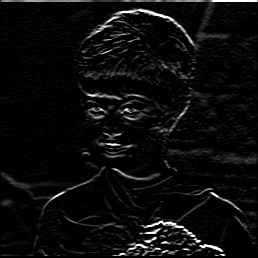

In [9]:
kernel_prewitt = np.array([[-1, -1, -1],
                           [0, 0, 0],
                           [1, 1, 1]])
cv2_imshow(convolution2d(img_gray, kernel_prewitt, 1, 2))

**5x5 Gaussian Blur**

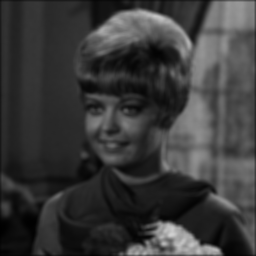

In [10]:
kernel_size = 5
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

**21x21 Gaussian Blur**

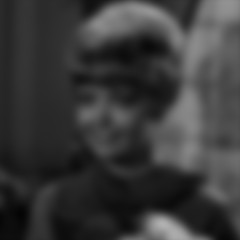

In [11]:
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

****

## **Tugas Praktikum**
Diketahui dataset KTP dengan kondisi citra yang berbeda. Lakukan perbaikan melalui implementasi teknik filterisasi dan detection setiap citra. Terapkan juga histogram equalization dan operasi aritmatika sebagai Teknik pendukung perbaikan citra KTP.

**Penyelesaian:**

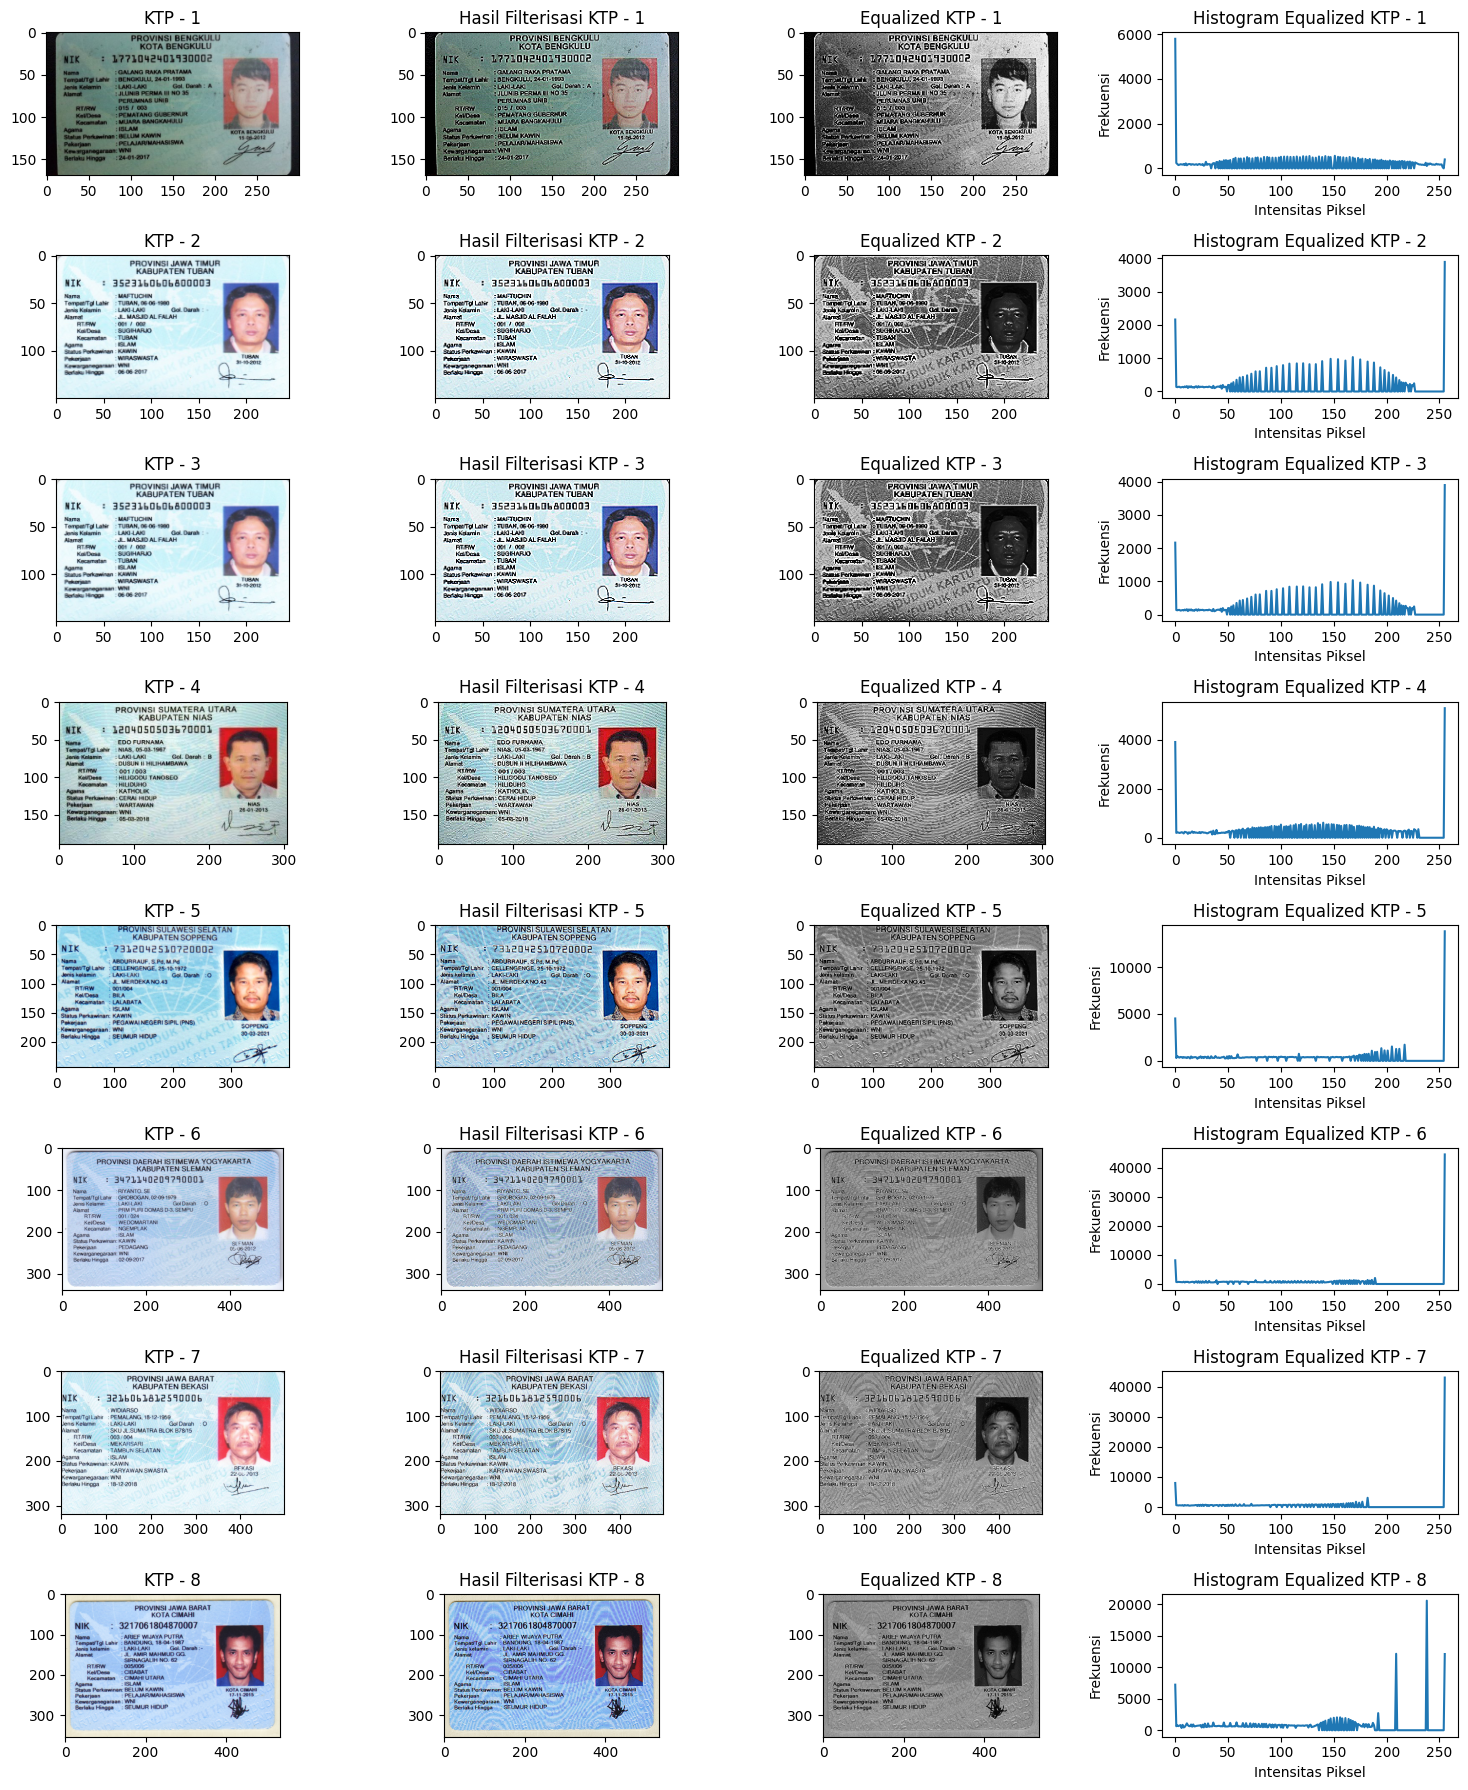

In [23]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

folder_path = '/content/drive/MyDrive/SEMESTER 5/PCVK/Images (1)/ktp_more/'

ktp_files = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

def Brightness(image, value):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v, value)
    v = np.clip(v, 0, 255)
    hsv = cv2.merge((h, s, v))
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

num_rows = len(ktp_files)
num_cols = 4
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 18))

for i, ktp_file in enumerate(ktp_files):
    ktp_path = os.path.join(folder_path, ktp_file)
    ktp_image = cv2.imread(ktp_path)
    ktp_image_resized = cv2.resize(ktp_image, (0, 0), fx=0.5, fy=0.5)
    brightness_adjusted = Brightness(ktp_image_resized, -10)
    result = cv2.filter2D(brightness_adjusted, -1, kernel_sharpen)

    result_gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
    result_equalized = cv2.equalizeHist(result_gray)
    result_equalized_color = cv2.cvtColor(result_equalized, cv2.COLOR_GRAY2BGR)

    axs[i, 0].imshow(cv2.cvtColor(ktp_image_resized, cv2.COLOR_BGR2RGB))
    axs[i, 0].set_title(f'KTP - {i+1}')

    axs[i, 1].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB,))
    axs[i, 1].set_title(f'Hasil Filterisasi KTP - {i+1}')

    axs[i, 2].imshow(cv2.cvtColor(result_equalized_color, cv2.COLOR_BGR2RGB))
    axs[i, 2].set_title(f'Equalized KTP - {i+1}')

    hist_equalized = cv2.calcHist([result_equalized], [0], None, [256], [0, 256])

    axs[i, 3].plot(hist_equalized)
    axs[i, 3].set_title(f'Histogram Equalized KTP - {i+1}')
    axs[i, 3].set_xlabel('Intensitas Piksel')
    axs[i, 3].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()